In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [253]:
# Load the dataset from the CSV file
df=pd.read_csv('etsy_dog.csv',encoding='latin1')
df

,Item Title,Item Price,Free Shipping,Total reviews
0,Dog Basket Bed | Cat Bungalow | Cat House | Ca...,124,Yes,609
1,3 Sizes Dog House SVG Laser Files / Cat House ...,3,No,3200
2,DOUBLE DOG KENNEL - diy plans,4,No,46
3,Dog House Plans with Porch for Large Breed Dog...,1,No,6
4,Leather ID Collar - Dog House Collar,14,No,308
...,...,...,...,...
1276,"40 Dog House SVG Bundle, Dog House dxf, Dog Ho...",3,No,2500
1277,Large Traditional Style Dog House Plans,9,No,28
1278,"Modern Dog House, Wooden Dog Bed, Dog House, M...",142,Yes,5
1279,Cover ONLY M L XL Heavy duty fabric replacemen...,25,Yes,126


In [254]:
#Convert 'Total reviews' column to numeric values
df['Total reviews']=pd.to_numeric(df['Total reviews'],errors='coerce')

In [255]:
#Convert 'Item Price' column to numeric values
df['Item Price']=pd.to_numeric(df['Item Price'],errors='coerce')

In [256]:
# Drop rows with NaN in 'Total reviews'
df.dropna(subset=['Total reviews'], inplace=True)

df

,Item Title,Item Price,Free Shipping,Total reviews
0,Dog Basket Bed | Cat Bungalow | Cat House | Ca...,124,Yes,609.0
1,3 Sizes Dog House SVG Laser Files / Cat House ...,3,No,3200.0
2,DOUBLE DOG KENNEL - diy plans,4,No,46.0
3,Dog House Plans with Porch for Large Breed Dog...,1,No,6.0
4,Leather ID Collar - Dog House Collar,14,No,308.0
...,...,...,...,...
1276,"40 Dog House SVG Bundle, Dog House dxf, Dog Ho...",3,No,2500.0
1277,Large Traditional Style Dog House Plans,9,No,28.0
1278,"Modern Dog House, Wooden Dog Bed, Dog House, M...",142,Yes,5.0
1279,Cover ONLY M L XL Heavy duty fabric replacemen...,25,Yes,126.0


In [257]:
# Convert the column to integers
df['Total reviews'] = df['Total reviews'].astype(int)
df

,Item Title,Item Price,Free Shipping,Total reviews
0,Dog Basket Bed | Cat Bungalow | Cat House | Ca...,124,Yes,609
1,3 Sizes Dog House SVG Laser Files / Cat House ...,3,No,3200
2,DOUBLE DOG KENNEL - diy plans,4,No,46
3,Dog House Plans with Porch for Large Breed Dog...,1,No,6
4,Leather ID Collar - Dog House Collar,14,No,308
...,...,...,...,...
1276,"40 Dog House SVG Bundle, Dog House dxf, Dog Ho...",3,No,2500
1277,Large Traditional Style Dog House Plans,9,No,28
1278,"Modern Dog House, Wooden Dog Bed, Dog House, M...",142,Yes,5
1279,Cover ONLY M L XL Heavy duty fabric replacemen...,25,Yes,126


In [258]:
#Calculate mean, median, standard deviation, min, max of the 'Item Price' column
mean_price=df['Item Price'].mean()
median_price=df['Item Price'].median()
std_dev_price=df['Item Price'].std()
min_price=df['Item Price'].min()
max_price=df['Item Price'].max()

In [259]:
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation Price: {std_dev_price}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Mean Price: 88.04156674660271
Median Price: 24.0
Standard Deviation Price: 280.983355860847
Minimum Price: 1
Maximum Price: 3999


In [260]:
#Calculate mean, median, standard deviation, min, max of the 'Total reviews' column
mean_reviews=df['Total reviews'].mean()
median_reviews=df['Total reviews'].median()
std_dev_reviews=df['Total reviews'].std()
min_reviews=df['Total reviews'].min()
max_reviews=df['Total reviews'].max()

In [261]:
print(f"Mean reviews: {mean_reviews}")
print(f"Median reviews: {median_reviews}")
print(f"Standard Deviation reviews: {std_dev_reviews}")
print(f"Minimum reviews: {min_reviews}")
print(f"Maximum reviews: {max_reviews}")

Mean reviews: 3087.1534772182254
Median reviews: 636.0
Standard Deviation reviews: 11902.271081387198
Minimum reviews: 1
Maximum reviews: 163800


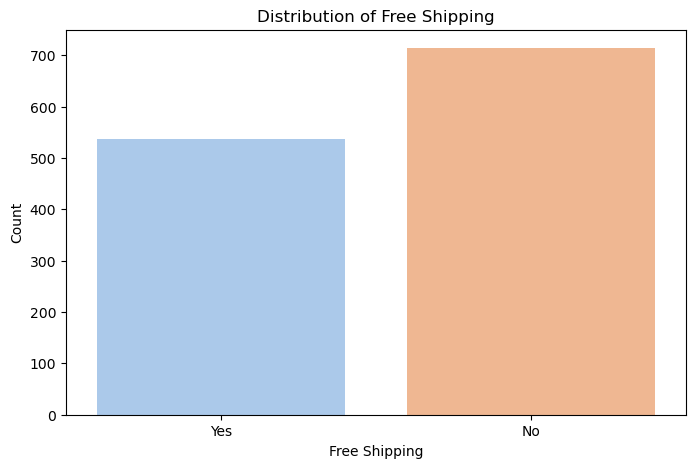

In [263]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Free Shipping', data=df, palette='pastel')
plt.xlabel('Free Shipping')
plt.ylabel('Count')
plt.title('Distribution of Free Shipping')
plt.show()

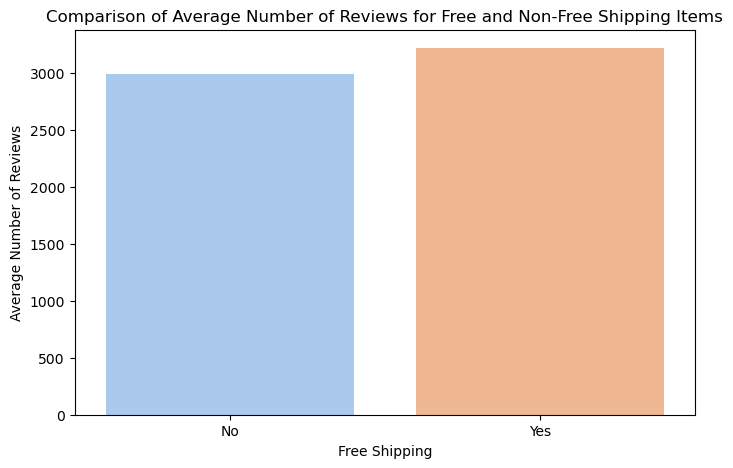

In [264]:
df['Free Shipping'] = df['Free Shipping'].apply(lambda x: x == 'Yes')

# Group by 'Free Shipping' and calculate mean of 'Total reviews'
average_reviews = df.groupby('Free Shipping')['Total reviews'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Free Shipping', y='Total reviews', data=average_reviews, palette='pastel')
plt.title('Comparison of Average Number of Reviews for Free and Non-Free Shipping Items')
plt.xlabel('Free Shipping')
plt.ylabel('Average Number of Reviews')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

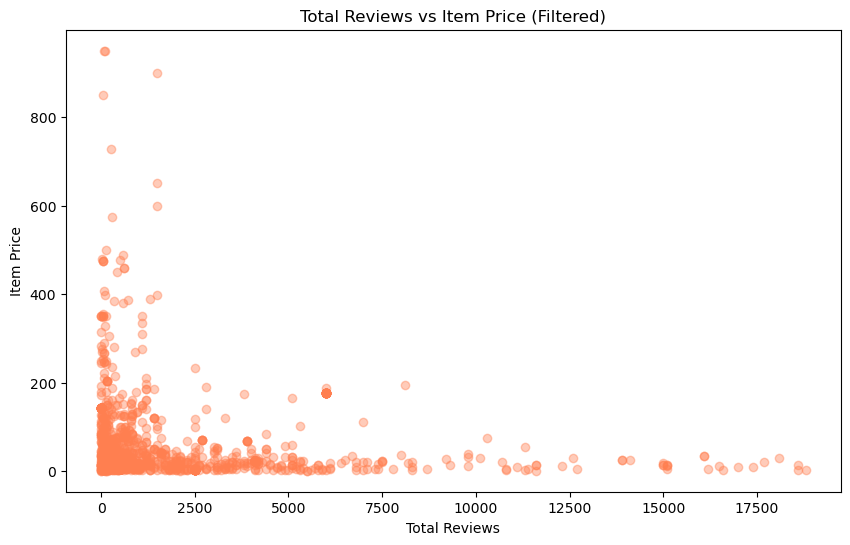

In [271]:
# Filter the DataFrame to exclude rows where 'Item Price' is 4000 or more
# and 'Total reviews' is 150000 or more
filtered_df = df[(df['Item Price'] < 1100) & (df['Total reviews'] < 20000)]

# Create a scatter plot with the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Total reviews'], filtered_df['Item Price'], color='coral', alpha=0.4)
plt.xlabel('Total Reviews')
plt.ylabel('Item Price')
plt.title('Total Reviews vs Item Price (Filtered)')
plt.show()

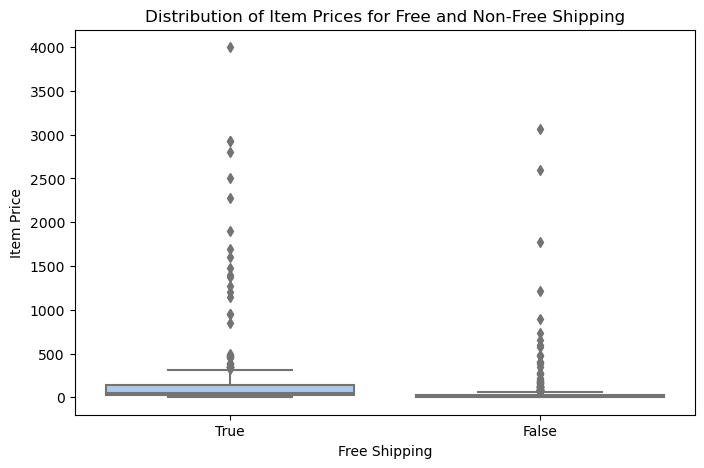

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'Free Shipping' and 'Item Price'
# Convert 'Free Shipping' to a string
df['Free Shipping'] = df['Free Shipping'].astype(str)

# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Free Shipping', y='Item Price', data=df, palette='pastel')
plt.title('Distribution of Item Prices for Free and Non-Free Shipping')
plt.xlabel('Free Shipping')
plt.ylabel('Item Price')
plt.show()